In [ ]:
import pandas as pd
df = pd.read_csv("/content/Social_Network_Ads.csv")
df.shape

(400, 5)

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.drop("User ID", axis=1, inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [ ]:
count_males = df[df["Gender"] == 1].shape[0]
count_males

196

In [ ]:
corr = df.corr(numeric_only=True)
corr.style.background_gradient(cmap = 'copper_r')

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


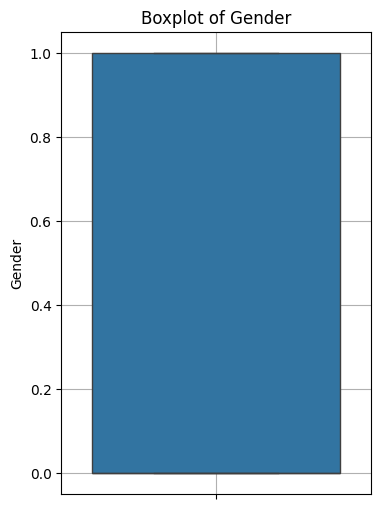

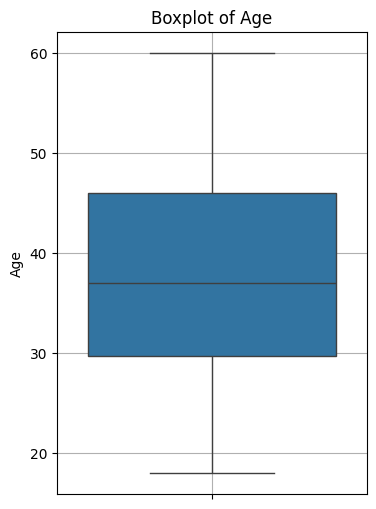

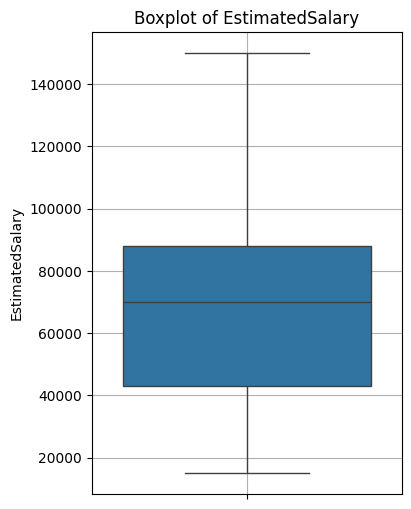

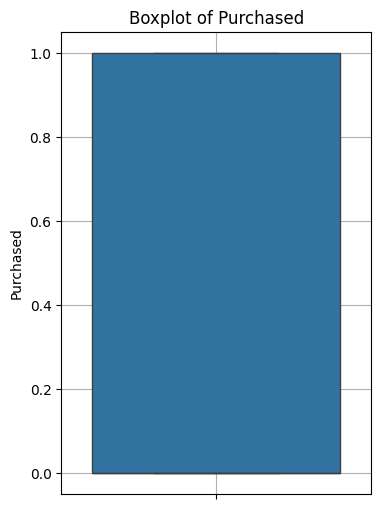

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df.columns:
    plt.figure(figsize=(4, 6))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.grid(True)
    plt.show()


In [ ]:
x=df.drop('Purchased',axis=1)
y=df["Purchased"]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


**RandomForestClassifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(n_estimators=80, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("\n--- Evaluation Metrics ---")
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("-----------------------------------------------------")

cm = confusion_matrix(y_test, y_pred)

print("Summary of Predictions by Gender:")

female_incorrect = cm[0,1]

male_correct = cm[1,1]
male_incorrect = cm[1,0]
print(f"Females (0): Correct predictions = {female_correct}, Incorrect predictions = {female_incorrect}")
print(f"Males (1): Correct predictions = {male_correct}, Incorrect predictions = {male_incorrect}")
print("-----------------------------------------------------")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))





--- Evaluation Metrics ---
✅ Accuracy: 0.9
-----------------------------------------------------
Summary of Predictions by Gender:
Females (0): Correct predictions = 47, Incorrect predictions = 5
Males (1): Correct predictions = 25, Incorrect predictions = 3
-----------------------------------------------------

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_smote, y_train_smote)

y_pred = model.predict(x_test)

print("\n--- Evaluation Metrics with SMOTE ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(f"Females (0): Correct = {cm[0,0]}, Incorrect = {cm[0,1]}")
print(f"Males (1): Correct = {cm[1,1]}, Incorrect = {cm[1,0]}")


Before SMOTE: Purchased
0    205
1    115
Name: count, dtype: int64
After SMOTE: Purchased
0    205
1    205
Name: count, dtype: int64

--- Evaluation Metrics with SMOTE ---
Accuracy: 0.9125

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93        52
           1       0.84      0.93      0.88        28

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80


Confusion Matrix:
Females (0): Correct = 47, Incorrect = 5
Males (1): Correct = 26, Incorrect = 2
